In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('FilteredDWDM1.csv')

In [ ]:
# Remove the 'Patient Id' column
data.drop('Patient Id', axis=1, inplace=True)

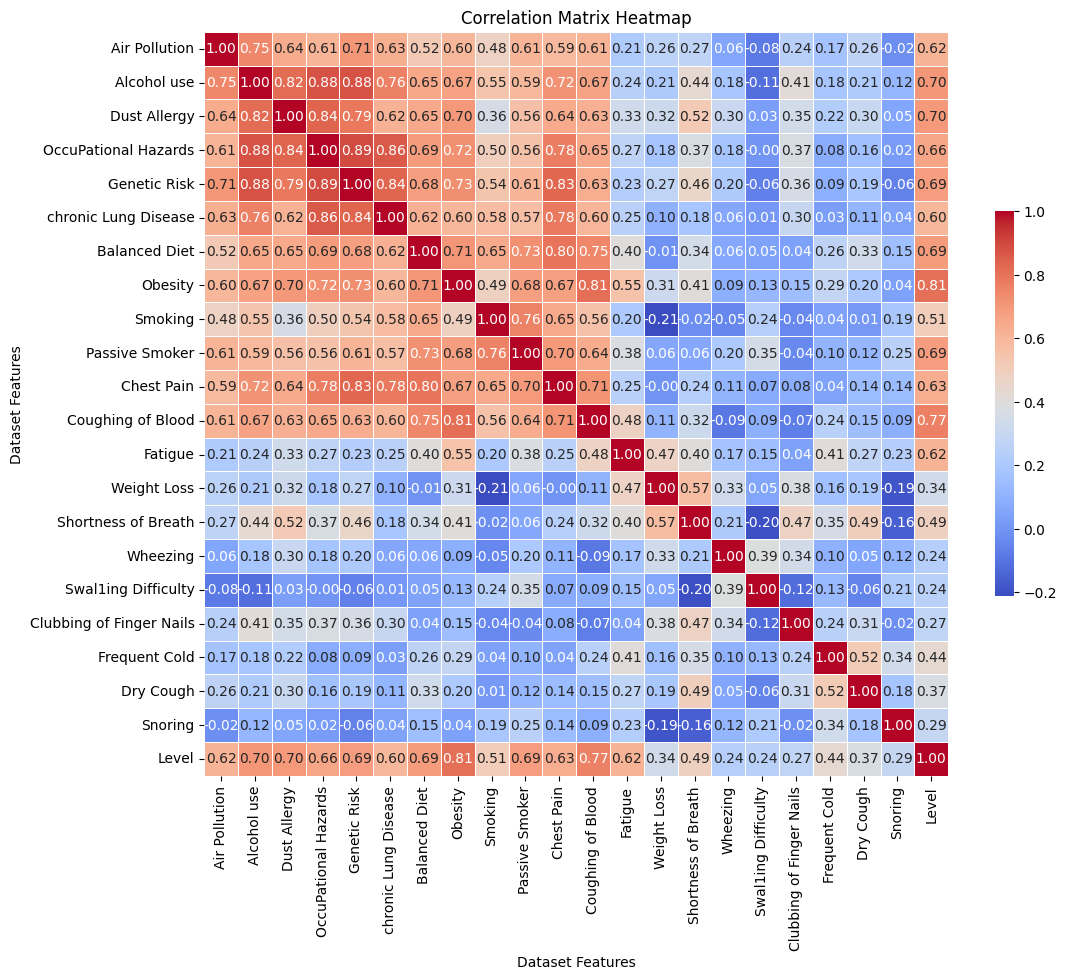

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add titles and labels for clarity
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Dataset Features')
plt.ylabel('Dataset Features')

# Show the plot
plt.show()

In [ ]:
# Separate features (X) and target variable (y)
X = data.drop('Level', axis=1)
y = data['Level']

In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert y to binary classification (0 and 1)
y_train_binary = (y_train == 2).astype(int)
y_test_binary = (y_test == 2).astype(int)

In [ ]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression(C=0.1)
logistic_model.fit(X_train, y_train_binary)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [ ]:
# Make predictions using logistic regression model
y_pred_logistic = logistic_model.predict(X_test)

In [ ]:
# Calculate confusion matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test_binary, y_pred_logistic)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix_logistic)

# Calculate false positives, false negatives, true positives, true negatives for Logistic Regression
tn_logistic, fp_logistic, fn_logistic, tp_logistic = conf_matrix_logistic.ravel()
print("True Negatives for Logistic Regression:", tn_logistic)
print("False Positives for Logistic Regression:", fp_logistic)
print("False Negatives for Logistic Regression:", fn_logistic)
print("True Positives for Logistic Regression:", tp_logistic)

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(y_test_binary, y_pred_logistic)
print("\nAccuracy for Logistic Regression:", accuracy_logistic)

# Display classification report for Logistic Regression
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test_binary, y_pred_logistic))

Confusion Matrix for Logistic Regression:
[[131   4]
 [  5  60]]
True Negatives for Logistic Regression: 131
False Positives for Logistic Regression: 4
False Negatives for Logistic Regression: 5
True Positives for Logistic Regression: 60

Accuracy for Logistic Regression: 0.955

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       135
           1       0.94      0.92      0.93        65

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [ ]:
# Initialize and train the Naive Bayes model with less smoothing
naive_bayes_model = GaussianNB(var_smoothing=0.01)  # Further reduce smoothing parameter
naive_bayes_model.fit(X_train, y_train)

# Make predictions using Naive Bayes model
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
print("\nNaive Bayes Model Accuracy:", accuracy_naive_bayes)

# Display classification report for Naive Bayes
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_naive_bayes))



Naive Bayes Model Accuracy: 0.88
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        56
           2       0.85      0.82      0.83        65
           3       0.84      0.96      0.89        79

    accuracy                           0.88       200
   macro avg       0.90      0.87      0.88       200
weighted avg       0.89      0.88      0.88       200



In [ ]:
# Calculate confusion matrix for Naive Bayes
conf_matrix_naive_bayes = confusion_matrix(y_test_binary, y_pred_naive_bayes)

# Extract values from confusion matrix
tn_naive_bayes = conf_matrix_naive_bayes[0, 0]
fp_naive_bayes = conf_matrix_naive_bayes[0, 1]
fn_naive_bayes = conf_matrix_naive_bayes[1, 0]
tp_naive_bayes = conf_matrix_naive_bayes[1, 1]

# Create 2x2 confusion matrix DataFrame for Naive Bayes
conf_matrix_naive_bayes_2x2 = pd.DataFrame([[tp_naive_bayes, fp_naive_bayes], [fn_naive_bayes, tn_naive_bayes]], index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

# Print confusion matrix for Naive Bayes
print("\nConfusion Matrix (2x2) for Naive Bayes:")
print(conf_matrix_naive_bayes_2x2)


Confusion Matrix (2x2) for Naive Bayes:
                 Predicted Positive  Predicted Negative
Actual Positive                   0                  47
Actual Negative                   0                   0


In [ ]:
# Initialize and train the Decision Tree model with less depth
decision_tree_model = DecisionTreeClassifier(max_depth=2)  # Limit depth further to reduce complexity
decision_tree_model.fit(X_train, y_train)

# Make predictions using Decision Tree model
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("\nDecision Tree Model Accuracy:", accuracy_decision_tree)

# Display classification report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_decision_tree))


Decision Tree Model Accuracy: 0.825
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           1       0.63      0.98      0.77        56
           2       1.00      0.68      0.81        65
           3       0.96      0.84      0.89        79

    accuracy                           0.82       200
   macro avg       0.86      0.83      0.82       200
weighted avg       0.88      0.82      0.83       200



In [ ]:
# Calculate confusion matrix for Decision Tree
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Extract values from confusion matrix
tn_decision_tree = conf_matrix_decision_tree[0, 0]
fp_decision_tree = conf_matrix_decision_tree[0, 1]
fn_decision_tree = conf_matrix_decision_tree[1, 0]
tp_decision_tree = conf_matrix_decision_tree[1, 1]

# Create 2x2 confusion matrix DataFrame for Decision Tree
conf_matrix_decision_tree_2x2 = pd.DataFrame([[tp_decision_tree, fp_decision_tree], [fn_decision_tree, tn_decision_tree]], index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

# Print confusion matrix for Decision Tree
print("\nConfusion Matrix (2x2) for Decision Tree:")
print(conf_matrix_decision_tree_2x2)


Confusion Matrix (2x2) for Decision Tree:
                 Predicted Positive  Predicted Negative
Actual Positive                  44                   0
Actual Negative                  19                  55


In [ ]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=30, max_depth=3, max_features='sqrt', random_state=42)  # Further reduce number of trees, limit depth, and feature sampling
random_forest_model.fit(X_train, y_train)

# Make predictions using Random Forest model
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("\nRandom Forest Model Accuracy:", accuracy_random_forest)

# Display classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_random_forest))


Random Forest Model Accuracy: 0.985
Classification Report for Random Forest:
              precision    recall  f1-score   support

           1       1.00      0.98      0.99        56
           2       1.00      0.97      0.98        65
           3       0.96      1.00      0.98        79

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.99       200
weighted avg       0.99      0.98      0.99       200



In [ ]:
# Calculate confusion matrix for Random Forest
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)

# Extract values from confusion matrix
tn_random_forest = conf_matrix_random_forest[0, 0]
fp_random_forest = conf_matrix_random_forest[0, 1]
fn_random_forest = conf_matrix_random_forest[1, 0]
tp_random_forest = conf_matrix_random_forest[1, 1]

# Create 2x2 confusion matrix DataFrame for Random Forest
conf_matrix_random_forest_2x2 = pd.DataFrame([[tp_random_forest, fp_random_forest], [fn_random_forest, tn_random_forest]], index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

# Print confusion matrix for Random Forest
print("\nConfusion Matrix (2x2) for Random Forest:")
print(conf_matrix_random_forest_2x2)


Confusion Matrix (2x2) for Random Forest:
                 Predicted Positive  Predicted Negative
Actual Positive                  63                   0
Actual Negative                   0                  55


In [ ]:
# Initialize and train the SVM model
svm_model = SVC(kernel='linear', C=0.01, random_state=42)  # Decrease C further
svm_model.fit(X_train, y_train)

# Make predictions using SVM model
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("\nSVM Model Accuracy:", accuracy_svm)

# Display classification report for SVM
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.965
Classification Report for SVM:
              precision    recall  f1-score   support

           1       1.00      0.91      0.95        56
           2       0.94      0.97      0.95        65
           3       0.96      1.00      0.98        79

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [ ]:
# Calculate confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Extract values from confusion matrix
tn_svm = conf_matrix_svm[0, 0]
fp_svm = conf_matrix_svm[0, 1]
fn_svm = conf_matrix_svm[1, 0]
tp_svm = conf_matrix_svm[1, 1]

# Create 2x2 confusion matrix DataFrame for SVM
conf_matrix_svm_2x2 = pd.DataFrame([[tp_svm, fp_svm], [fn_svm, tn_svm]], index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

# Print confusion matrix for SVM
print("\nConfusion Matrix (2x2) for SVM:")
print(conf_matrix_svm_2x2)


Confusion Matrix (2x2) for SVM:
                 Predicted Positive  Predicted Negative
Actual Positive                  63                   4
Actual Negative                   0                  51


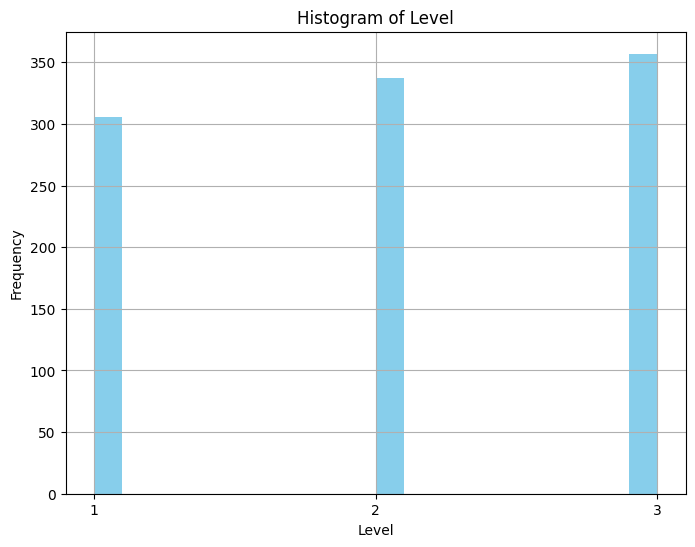

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('FilteredDWDM1.csv')

# Remove the 'Patient Id' column
data.drop('Patient Id', axis=1, inplace=True)

# Plot histogram for the 'Level' feature
plt.figure(figsize=(8, 6))
plt.hist(data['Level'], bins=20, color='skyblue')
plt.title('Histogram of Level')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.xticks([1, 2, 3])  # Set x-axis ticks to only display 1, 2, and 3
plt.grid(True)
plt.show()

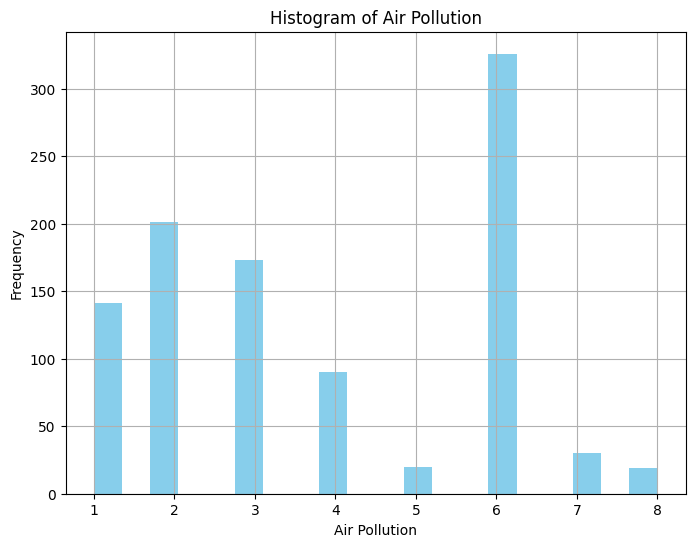

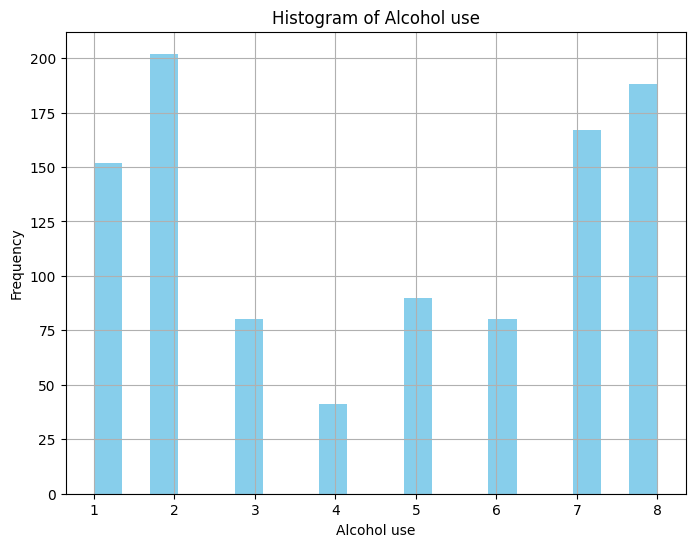

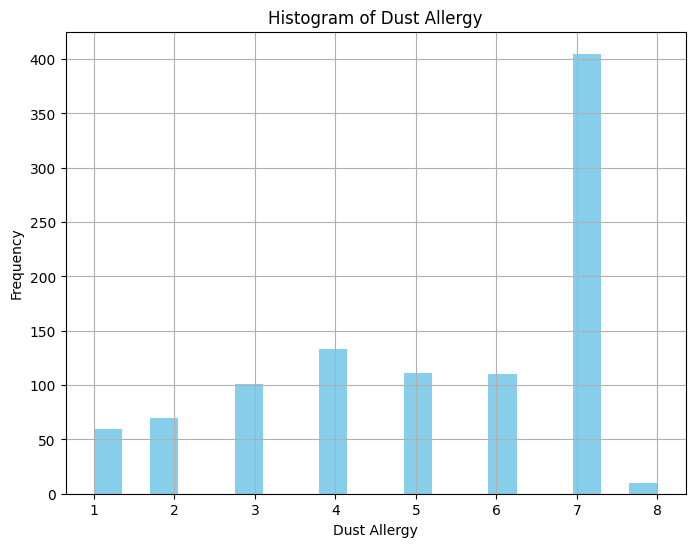

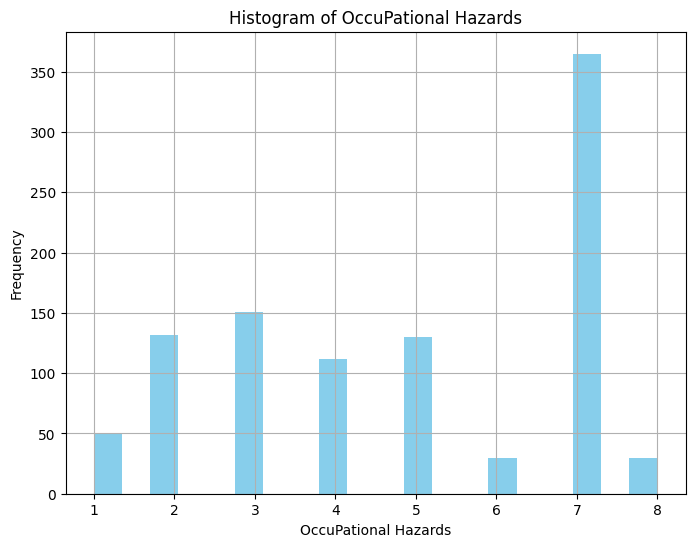

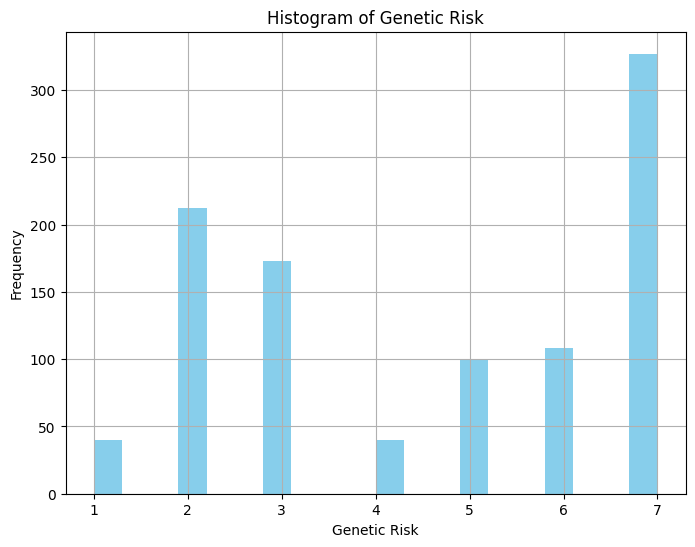

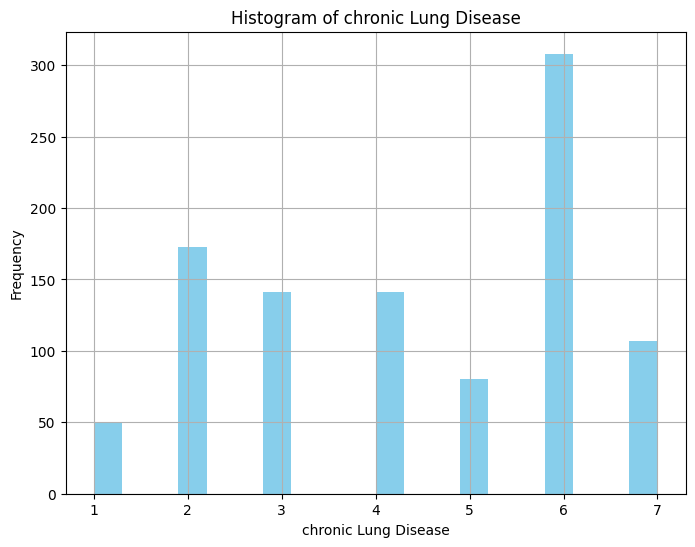

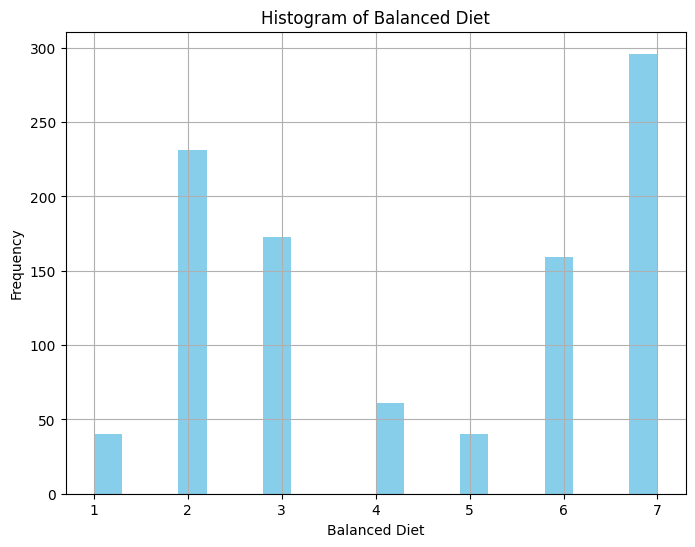

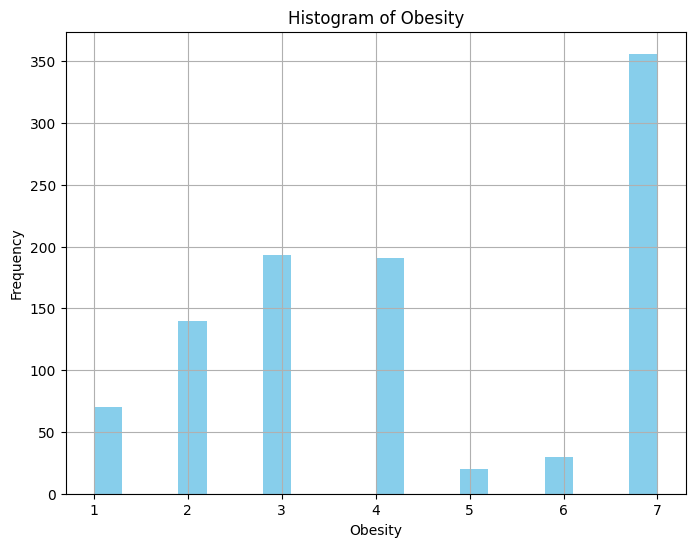

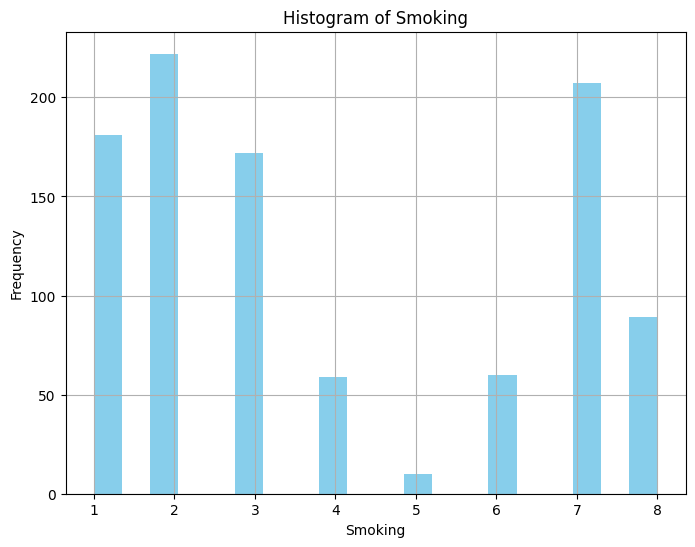

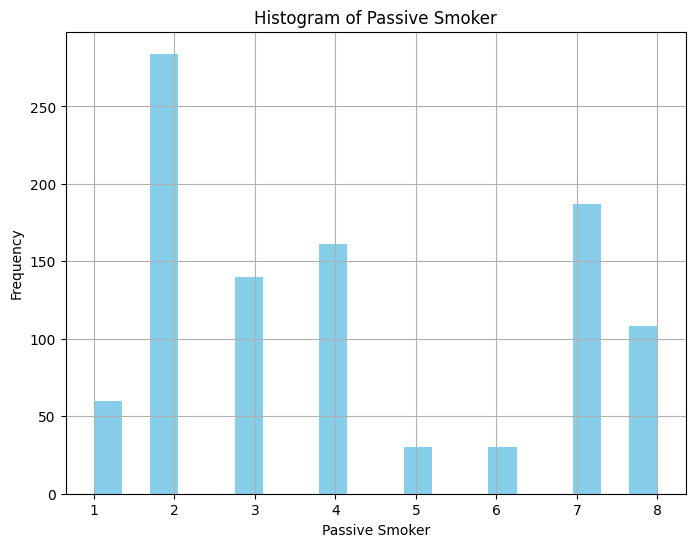

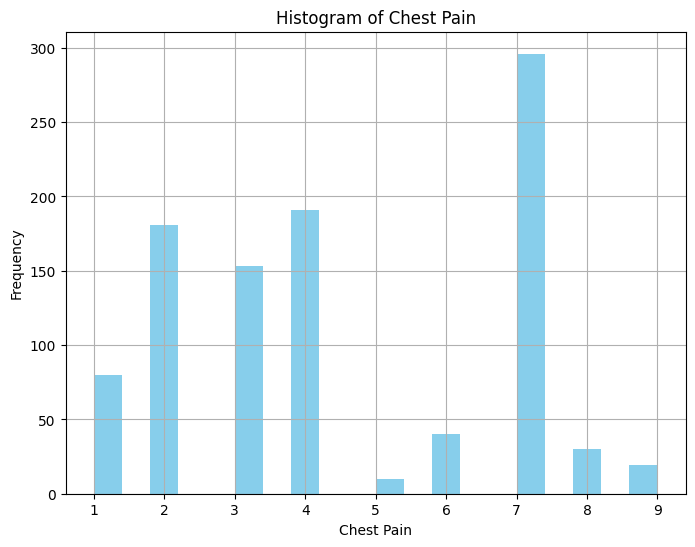

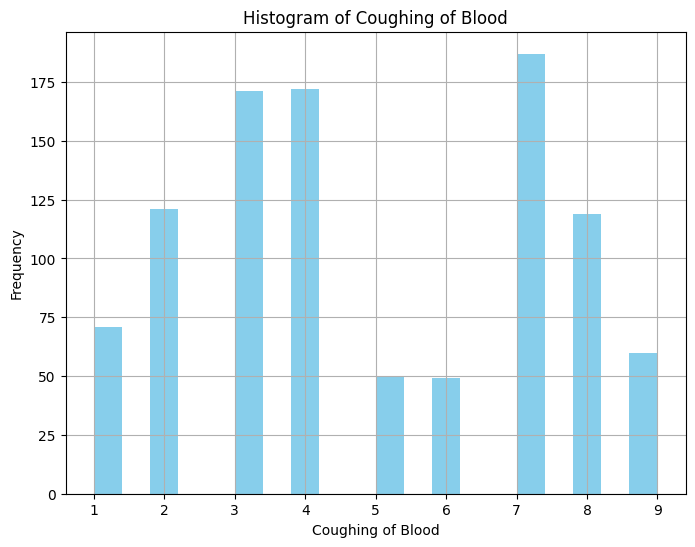

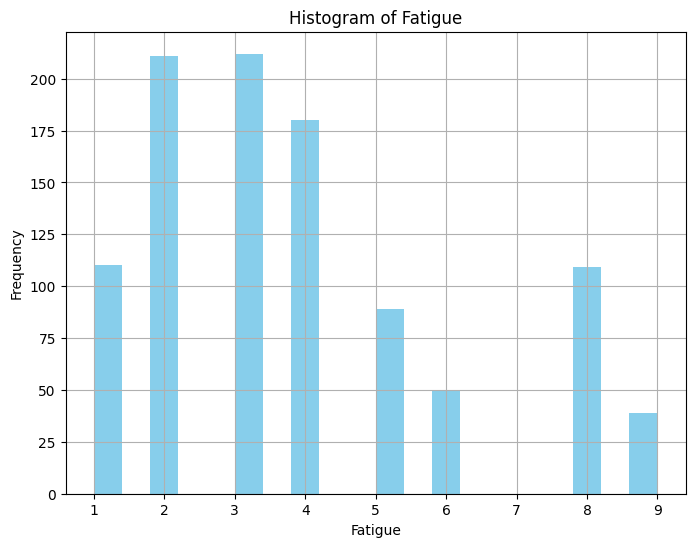

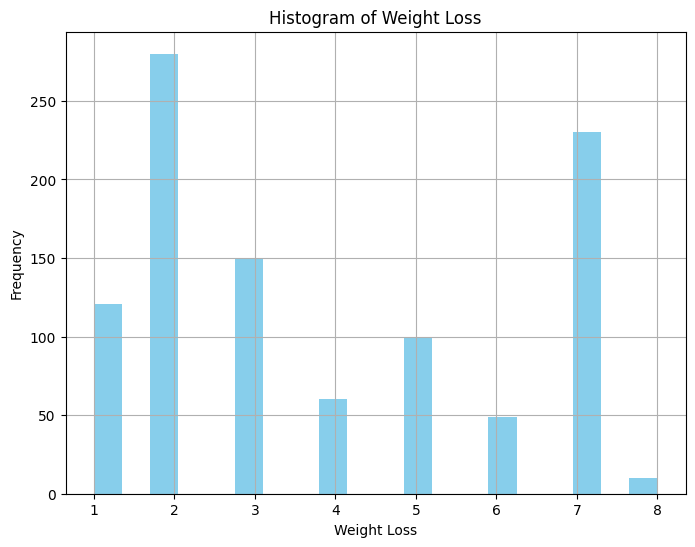

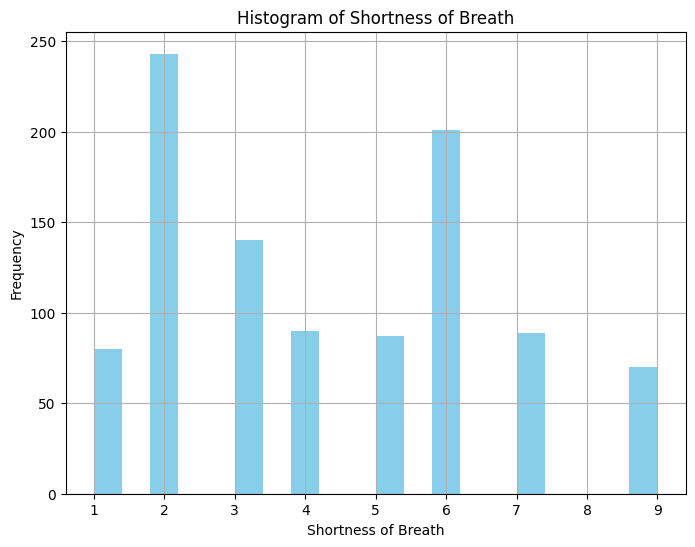

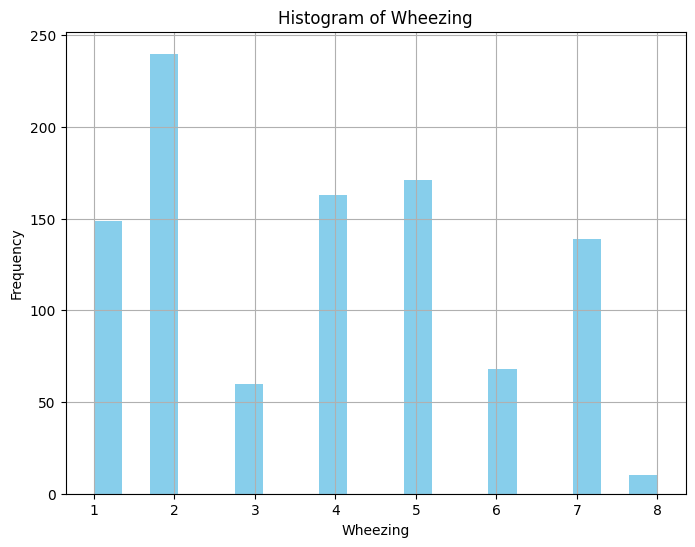

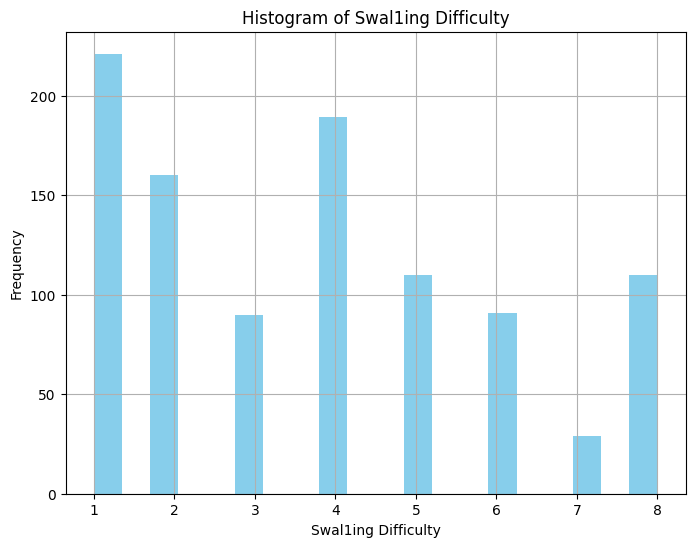

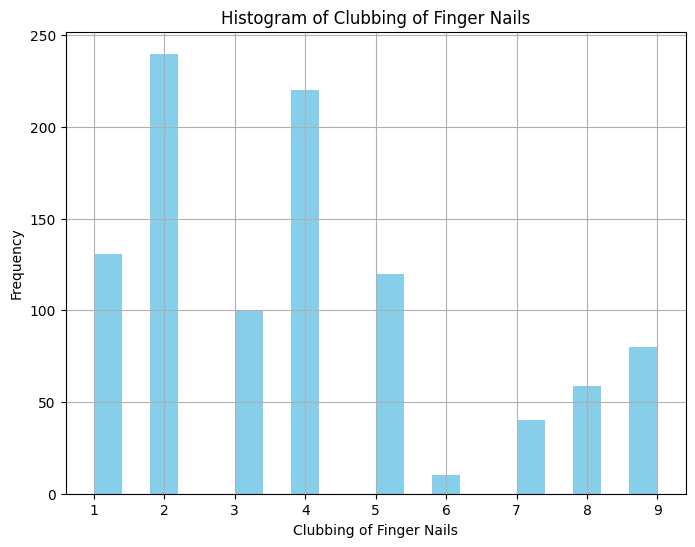

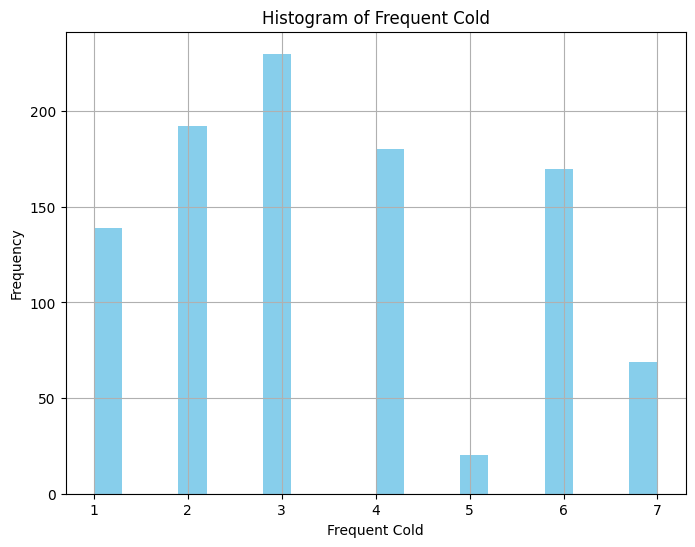

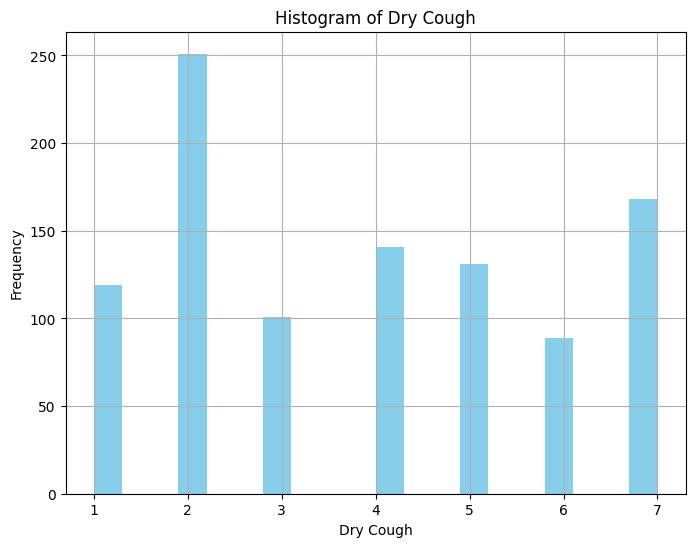

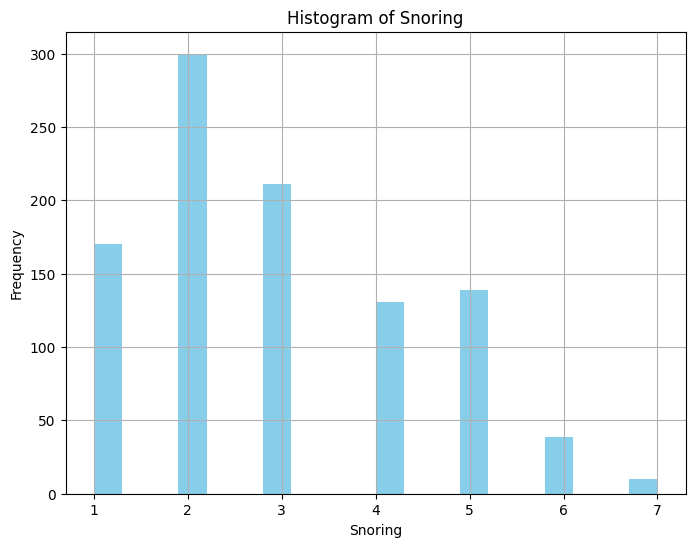

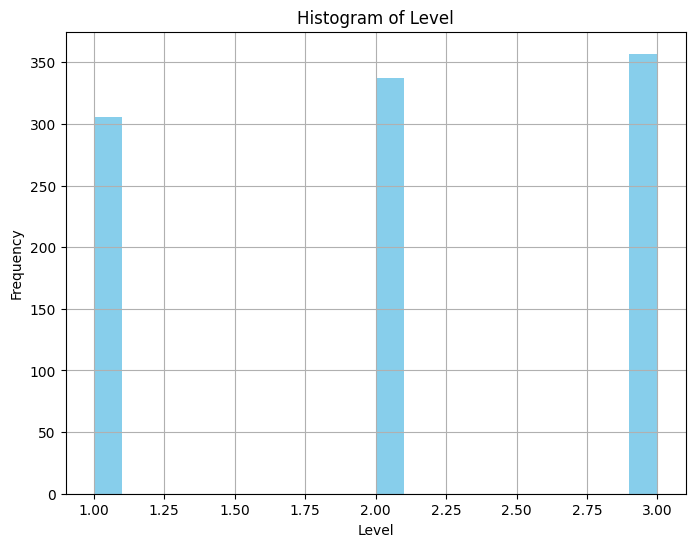

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('FilteredDWDM1.csv')

# Remove the 'Patient Id' column
data.drop('Patient Id', axis=1, inplace=True)

# Plot histograms for each feature
for column in data.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=20, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


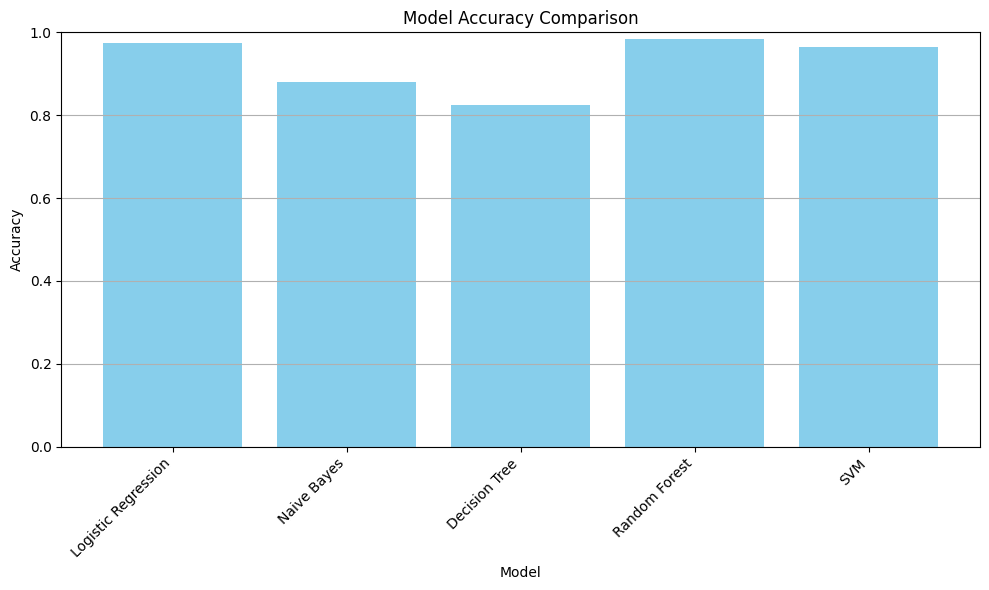

In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(C=0.1),
    'Naive Bayes': GaussianNB(var_smoothing=0.01),
    'Decision Tree': DecisionTreeClassifier(max_depth=2),
    'Random Forest': RandomForestClassifier(n_estimators=30, max_depth=3, max_features='sqrt', random_state=42),
    'SVM': SVC(kernel='linear', C=0.01, random_state=42)
}

# Train and evaluate models
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

ROC-AUC Score: 0.9536752136752137


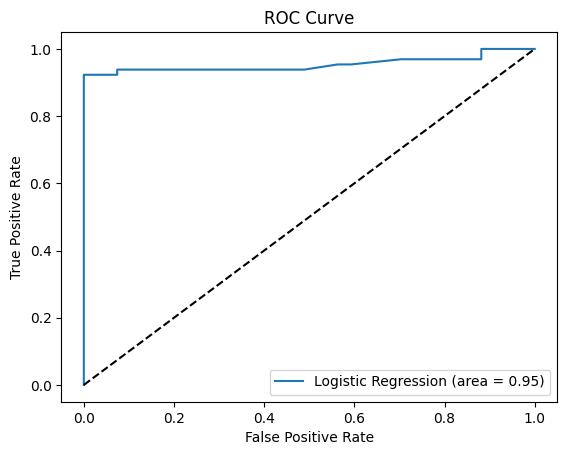

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Assuming y_test are the true labels and y_pred_proba are the probabilities for the positive class
y_pred_proba = logistic_model.predict_proba(X_test)[:,1]  # Get probabilities for the positive class

# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Precision-Recall AUC: 0.9606159341279406


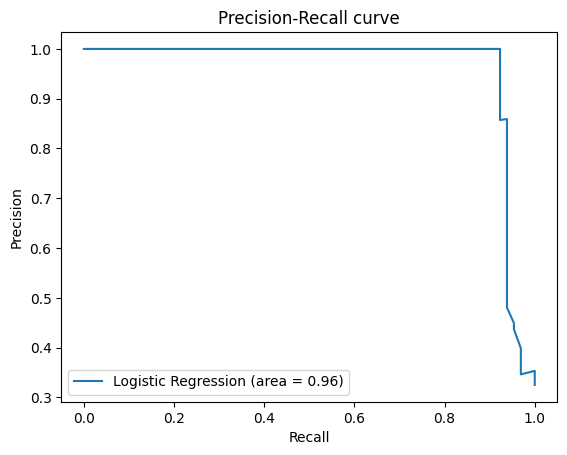

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_binary, y_pred_proba)

# Calculate AUC for Precision-Recall Curve
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Logistic Regression (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


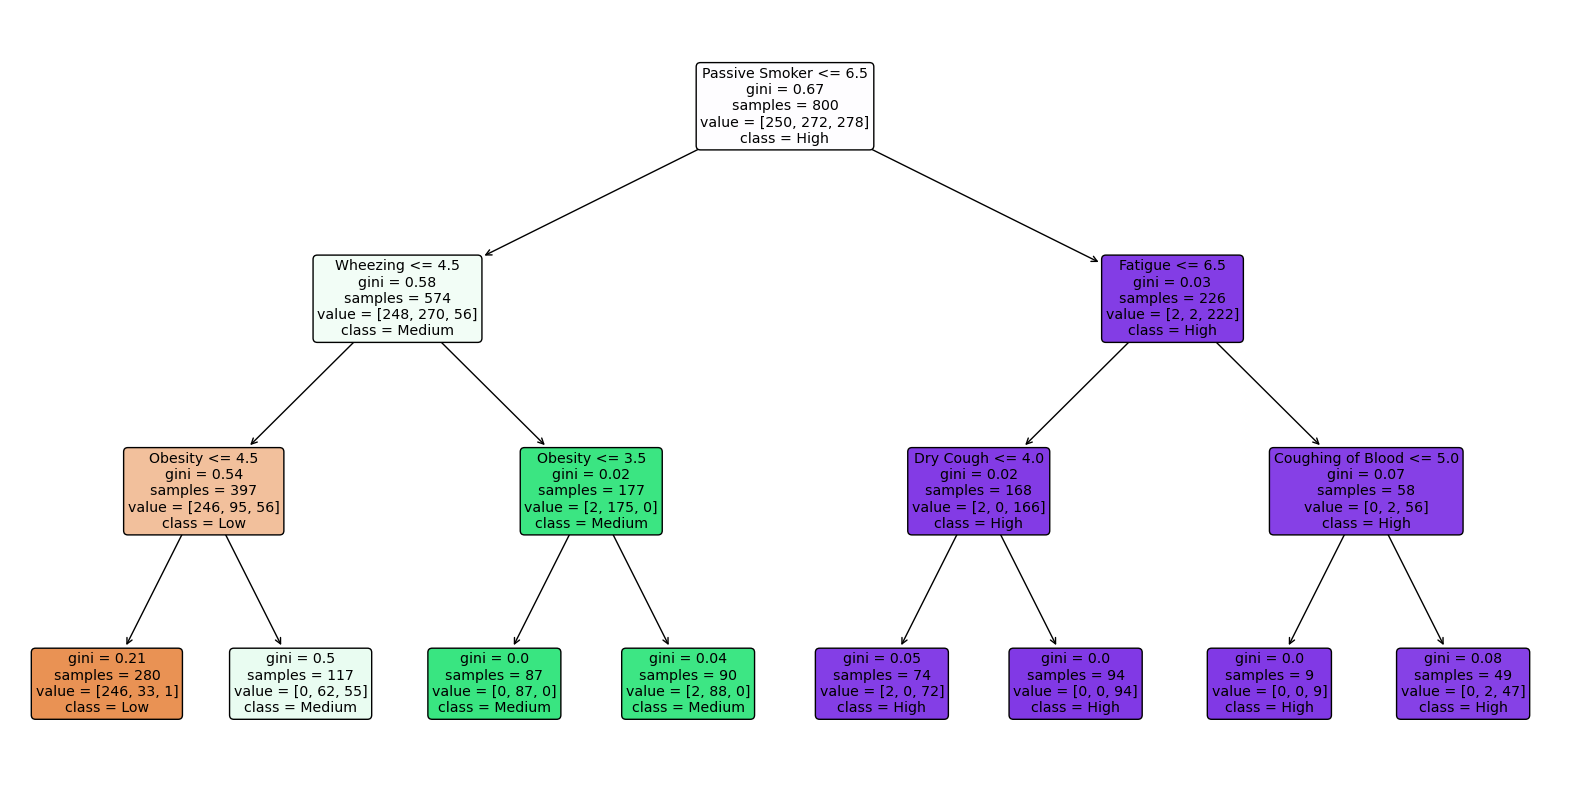

In [ ]:
# Initialize and train the decision tree classifier
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Set up the plot size
plt.figure(figsize=(20,10))

# Plot the decision tree
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], rounded=True, proportion=False, precision=2)

# Display the plot
plt.show()


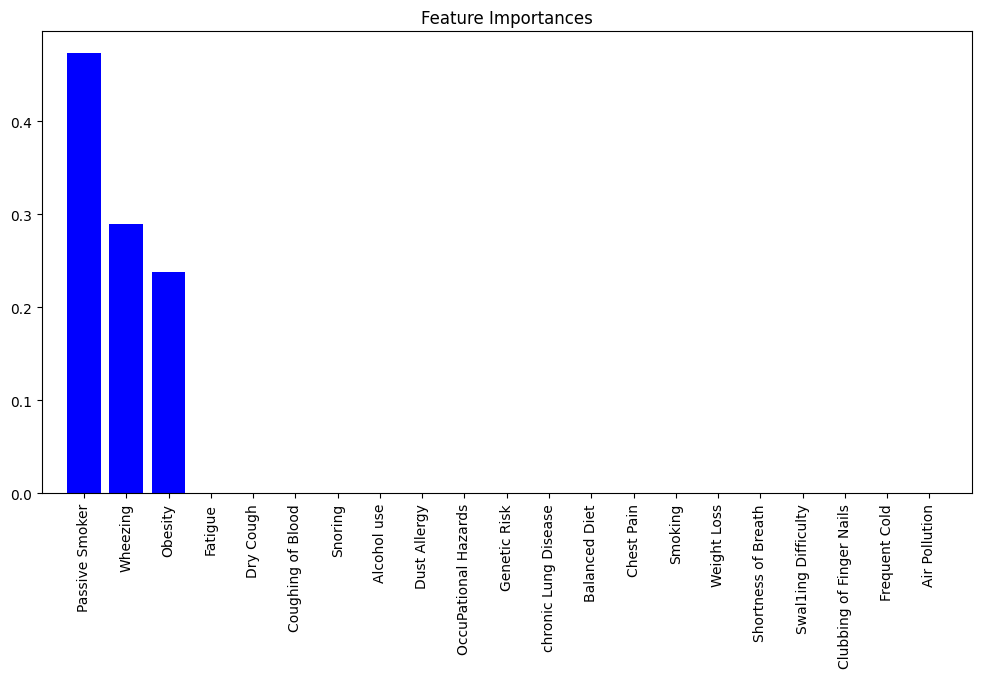

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = tree_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), feature_importances[indices], color='b', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()